<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Joaquín Herrera Suárez
- Nombre de alumno 2: Hecmar Taucare Reyes

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Joaquin-HS/MDS7202)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.

**Respuesta**:

In [3]:
import pandas as pd
import plotly.express as px

# Se cargan los datos
data = pd.read_csv('energia_homero.csv')

# Se convierte la columna 'date' al formato datetime
data['date'] = pd.to_datetime(data['date'])

# Se visualizan los primeros registros
display(data.head())

# Se visualiza la evolución del consumo energético
fig = px.line(data, x='date', y='Energy_kWh', title='Consumo Energético Diario en la Casa de Homero Simpson')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Consumo de Energía (kWh)')
fig.show()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [4]:
# 0.

# Conjuntos de entrenamiento y prueba
train_data = data[data['date'] <= '2020-02-29']
test_data = data[data['date'] >= '2020-03-01']

print(f"Tamaño del conjunto de entrenamiento: {train_data.shape}")
print(f"Tamaño del conjunto de prueba: {test_data.shape}")

Tamaño del conjunto de entrenamiento: (1369, 2)
Tamaño del conjunto de prueba: (129, 2)


In [5]:
# 1.

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Columna 'time' como un índice numérico de tiempo para hacer la regresión lineal
train_data['time'] = (train_data['date'] - train_data['date'].min()).dt.days
test_data['time'] = (test_data['date'] - train_data['date'].min()).dt.days

# Pipeline que usa una regresión lineal para capturar la tendencia
Pipeline_trend = Pipeline([
    ('scaler', StandardScaler()),  # Se estandariza los datos de tiempo
    ('linear', LinearRegression())  # Modelo de regresión lineal
])

<ipython-input-5-ff0de87723a5>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-ff0de87723a5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MAE en el conjunto de entrenamiento: 10.568154088025606
MAE en el conjunto de prueba: 8.655813997873521


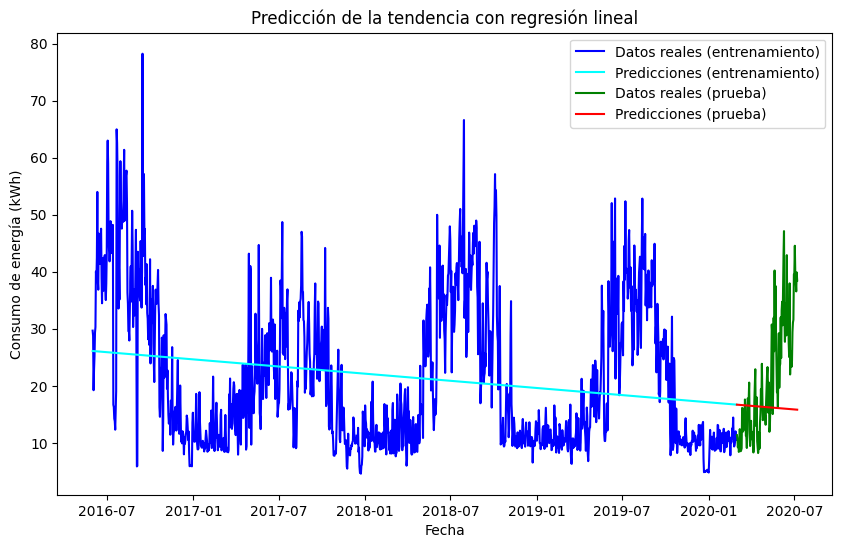

In [6]:
# 2.

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Se entrena el pipeline en los datos de entrenamiento
X_train = train_data[['time']]
y_train = train_data['Energy_kWh']
Pipeline_trend.fit(X_train, y_train)

# Se hacen predicciones en el conjunto de entrenamiento y prueba
X_test = test_data[['time']]
y_test = test_data['Energy_kWh']

train_preds = Pipeline_trend.predict(X_train)
test_preds = Pipeline_trend.predict(X_test)

# Se calcula el MAE en ambos conjuntos
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print(f"MAE en el conjunto de entrenamiento: {train_mae}")
print(f"MAE en el conjunto de prueba: {test_mae}")

# Se grafican las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], y_train, label='Datos reales (entrenamiento)', color='blue')
plt.plot(train_data['date'], train_preds, label='Predicciones (entrenamiento)', color='cyan')
plt.plot(test_data['date'], y_test, label='Datos reales (prueba)', color='green')
plt.plot(test_data['date'], test_preds, label='Predicciones (prueba)', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.title('Predicción de la tendencia con regresión lineal')
plt.legend()
plt.show()

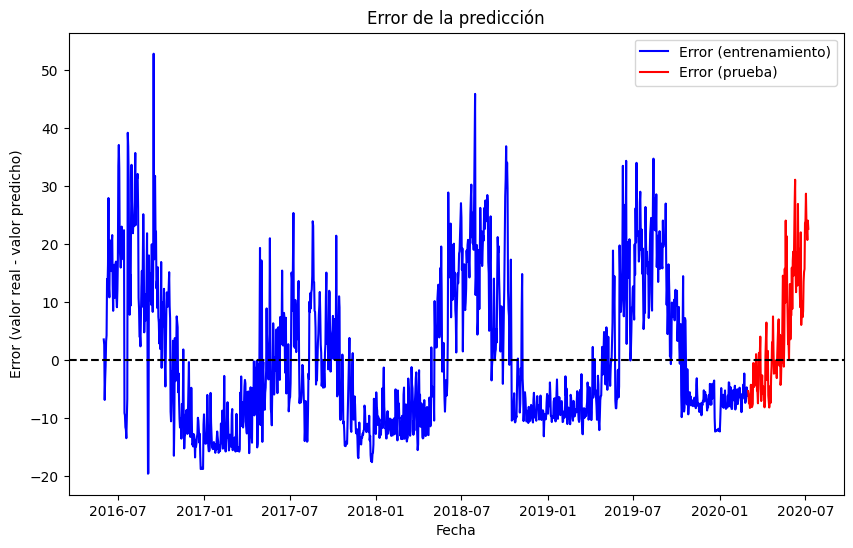

In [7]:
# 3.

# Se calcula el error en todo el intervalo de tiempo
train_error = y_train - train_preds
test_error = y_test - test_preds

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_error, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['date'], test_error, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de la predicción')
plt.legend()
plt.show()

Como se puede observar en la imagen, efectivamente hay un comportamiento estacional en la serie de tiempo, notando que en primavera/verano (considerando la zona horario chilena) los consumos de energía eléctrica son menores que en el resto del año. Se destaca que el modelo lineal no tiene buen desempeño para la predicción, ya que no es capaz de captar este patrón estacional, pero si es capaz de captar la tendencia, la cual va a la baja.

In [8]:
# 4.

from sklearn.preprocessing import FunctionTransformer

# Función para generar términos de Fourier
def fourier_terms(X, period, order):
    time = X['time'].values
    terms = [np.sin(2 * np.pi * (i + 1) * time / period) for i in range(order)]
    terms += [np.cos(2 * np.pi * (i + 1) * time / period) for i in range(order)]
    return np.vstack(terms).T

# Periodo y número de términos de Fourier
P = 365  # Un año
n_terms = 3  # Número de términos de Fourier (se consideran solo las primeras componentes, ya que son las de mayor aporte)

# Se crea el pipeline para modelar la estacionalidad con Fourier
Pipeline_seasonal = Pipeline([
    ('fourier', FunctionTransformer(lambda X: fourier_terms(X, P, n_terms), validate=False)),
    ('linear', LinearRegression())
])

MAE (estacional) en el conjunto de entrenamiento: 5.408663097283418
MAE (estacional) en el conjunto de prueba: 4.2626876763217645


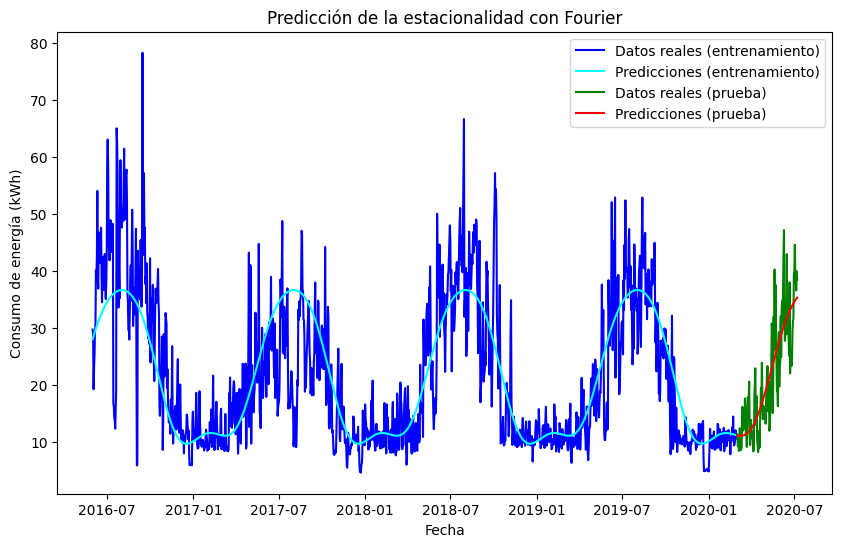

In [9]:
# 5.

# Se entrena el pipeline de estacionalidad
Pipeline_seasonal.fit(X_train, y_train)

# Predicciones
train_preds_seasonal = Pipeline_seasonal.predict(X_train)
test_preds_seasonal = Pipeline_seasonal.predict(X_test)

# Se calcula el MAE
train_mae_seasonal = mean_absolute_error(y_train, train_preds_seasonal)
test_mae_seasonal = mean_absolute_error(y_test, test_preds_seasonal)

print(f"MAE (estacional) en el conjunto de entrenamiento: {train_mae_seasonal}")
print(f"MAE (estacional) en el conjunto de prueba: {test_mae_seasonal}")

# Graficar predicciones con estacionalidad
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], y_train, label='Datos reales (entrenamiento)', color='blue')
plt.plot(train_data['date'], train_preds_seasonal, label='Predicciones (entrenamiento)', color='cyan')
plt.plot(test_data['date'], y_test, label='Datos reales (prueba)', color='green')
plt.plot(test_data['date'], test_preds_seasonal, label='Predicciones (prueba)', color='red')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.title('Predicción de la estacionalidad con Fourier')
plt.legend()
plt.show()

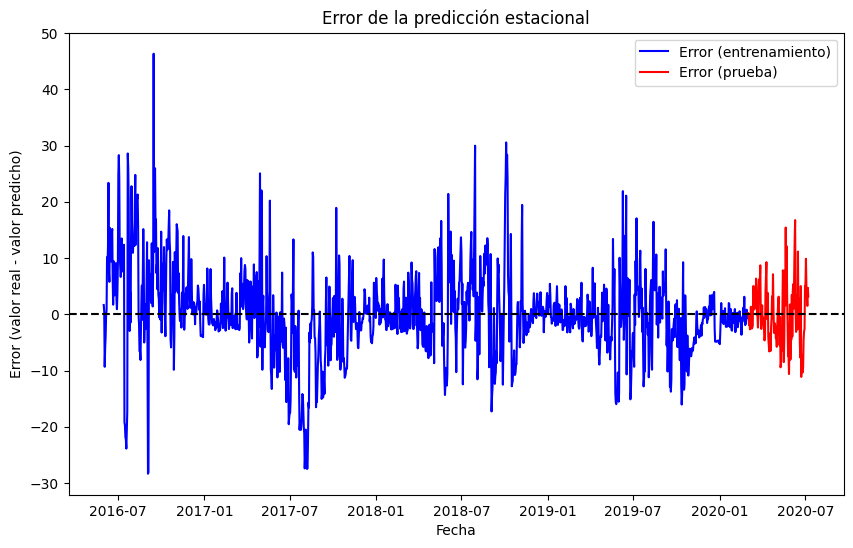

In [10]:
# 6.

# Se calcula el error para el modelo estacional
train_error_seasonal = y_train - train_preds_seasonal
test_error_seasonal = y_test - test_preds_seasonal

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_error_seasonal, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['date'], test_error_seasonal, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de la predicción estacional')
plt.legend()
plt.show()

Como se puede ver en el gráfico de predicción, este modelo si que es capaz de representar la estacionalidad de la serie de tiempo (esto se realza al obtener valores de MAE mucho menores con respecto al modelo anterior). Ahora bien, tanto en este gráfico como en el de error, se puede ver como los datos cuentan con mucho ruido y/o grandes saltos de gasto energético entre días contiguos.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [11]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [12]:
# 1.

# Se renombran las columnas en el conjunto de entrenamiento y prueba
train_data = train_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data = test_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

train_data.head()

,ds,y,time
0,2016-06-01,29.691,0
1,2016-06-02,28.789,1
2,2016-06-03,19.247,2
3,2016-06-04,22.883,3
4,2016-06-05,25.195,4


In [13]:
# 2.

# Modelo Prophet
model = Prophet()

# Se ajusta el modelo con los datos de entrenamiento
model.fit(train_data)

# Se crea un DataFrame para generar predicciones, combinando el conjunto de entrenamiento y prueba
future_dates = pd.concat([train_data[['ds']], test_data[['ds']]])

# Se generan las predicciones
forecast = model.predict(future_dates)

# Se revisan las primeras predicciones
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/ua46mom_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/um9w31xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89477', 'data', 'file=/tmp/tmpmbnjwzam/ua46mom_.json', 'init=/tmp/tmpmbnjwzam/um9w31xj.json', 'output', 'file=/tmp/tmpmbnjwzam/prophet_model9px9t2zi/prophet_model-20241021001313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,33.995624,25.234869,43.383925
1,2016-06-02,34.620477,26.402527,43.864743
2,2016-06-03,34.919703,26.507121,44.202472
3,2016-06-04,37.214786,28.204622,46.343044
4,2016-06-05,38.375252,29.649309,47.270491


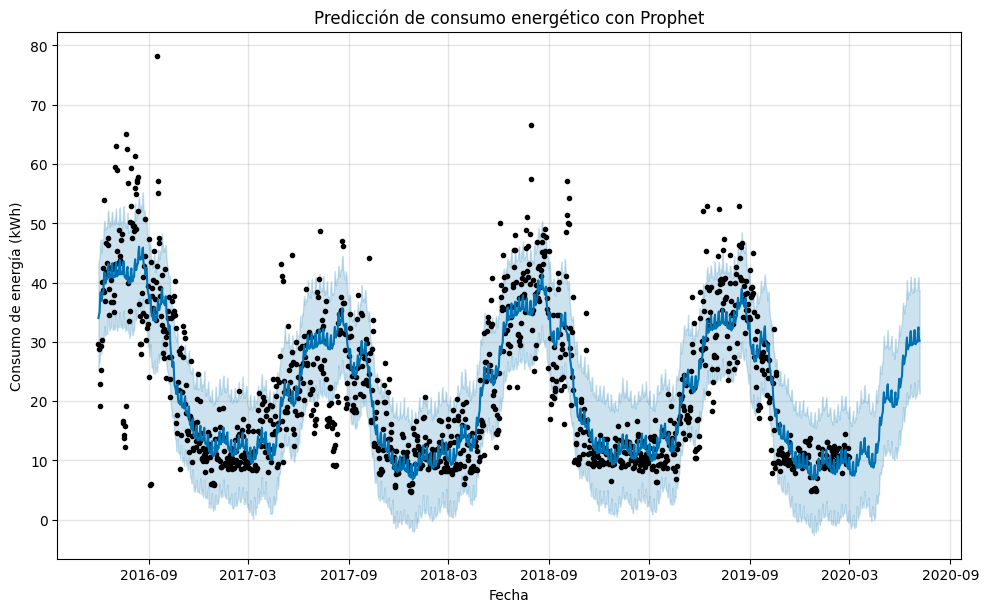

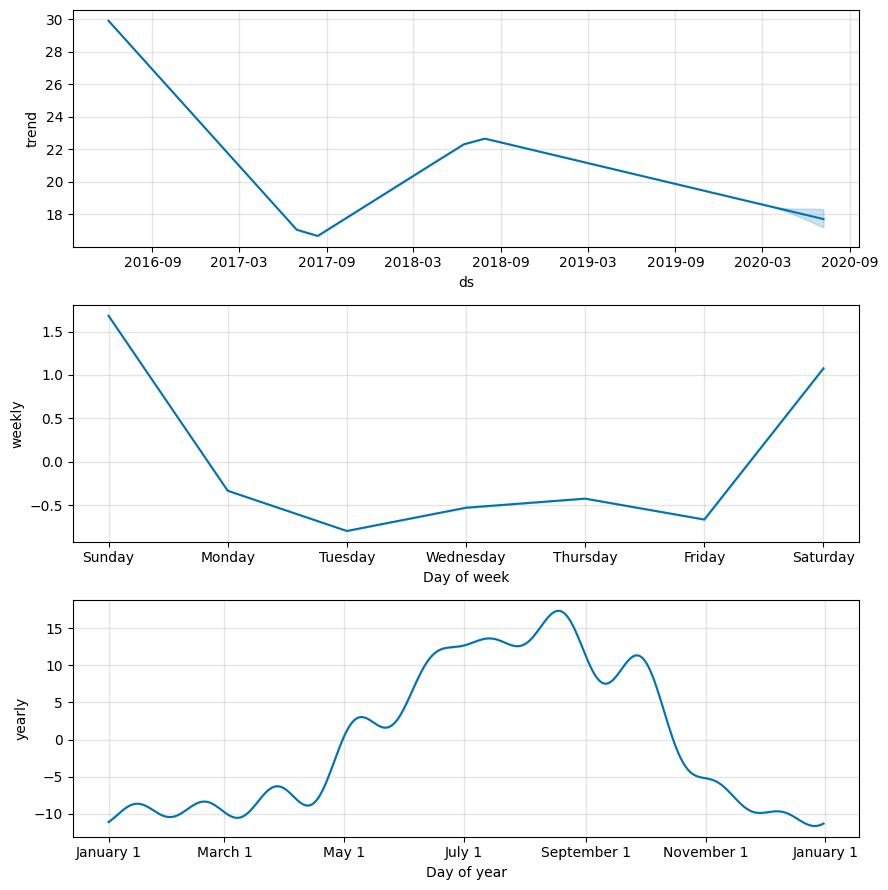

In [14]:
# 3.

import matplotlib.pyplot as plt

# Se grafican las predicciones
model.plot(forecast)
plt.title('Predicción de consumo energético con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.show()

# Se grafican las componentes (tendencia, estacionalidad)
model.plot_components(forecast)
plt.show()

In [15]:
# 4.

from sklearn.metrics import mean_absolute_error

# Se combinan las predicciones con los valores reales en los conjuntos de entrenamiento y prueba
train_forecast = forecast[forecast['ds'] <= '2020-02-29']
test_forecast = forecast[forecast['ds'] >= '2020-03-01']

# Se calcula el MAE para el conjunto de entrenamiento y prueba
train_mae_prophet = mean_absolute_error(train_data['y'], train_forecast['yhat'])
test_mae_prophet = mean_absolute_error(test_data['y'], test_forecast['yhat'])

print(f"MAE en el conjunto de entrenamiento (Prophet): {train_mae_prophet}")
print(f"MAE en el conjunto de prueba (Prophet): {test_mae_prophet}")

MAE en el conjunto de entrenamiento (Prophet): 4.817481017717443
MAE en el conjunto de prueba (Prophet): 4.921079315201517


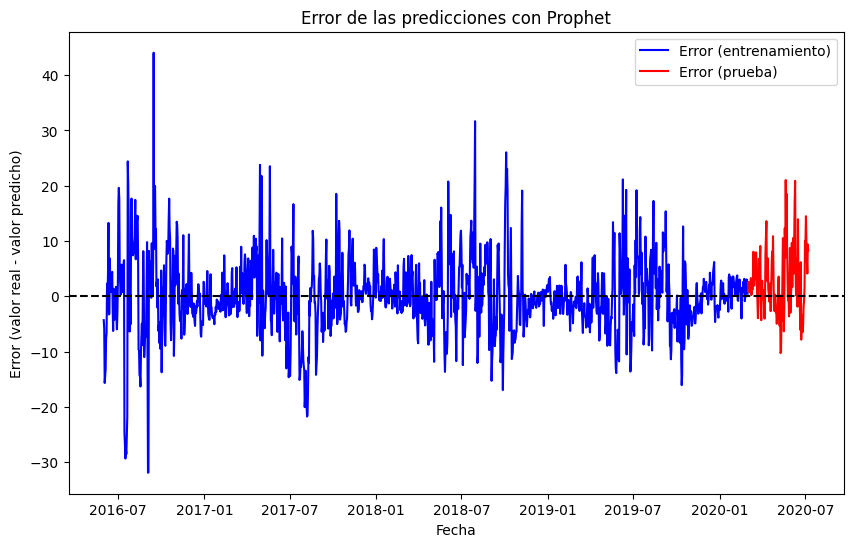

In [16]:
# 5.

# Se calcula el error en todo el intervalo de tiempo
train_error_prophet = train_data['y'] - train_forecast['yhat']
test_error_prophet = test_data['y'] - test_forecast['yhat']

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_error_prophet, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['ds'], test_error_prophet, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de las predicciones con Prophet')
plt.legend()
plt.show()

En este caso nuevamente se aprecia un comportamiento estacional en la serie de tiempo analizada. En particular, se aprecian valores de MAE levemente menores a los obtenidos previamente para entrenamiento, pero ahora con un pequeño sobreajuste, y para prueba un valores un poco mayores.

Por otro lado, se destaca un gran intervalo de confianza con respecto a las predicciones que realiza el modelo. Además, la tendencia que captura este mismo es más específica que la vista con LinearRegression, ya que captura más información: también va a la baja, pero con un leve peak durante un año (2017-2018). Por último, los comportamientos semanales indican un aumento en el consumo en los fines de semana, lo que se explica porque las personas pasan más tiempo en el hogar; y los anuales señalan nuevamente lo que se mencionó anteriormente: durante primavera/verano (para la zona horaria chilena) el consumo energético es menor.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [17]:
# 0.

# Se cargan los datos meteorológicos proporcionados por Frink
datos_frink = pd.read_csv('datos_frink.csv')

# Se convierte la columna 'date' al formato datetime
datos_frink['date'] = pd.to_datetime(datos_frink['date'])

# Se seleccionan las variables que se consideran más relevantes para el consumo
# energético (temperaturas, humedad y velocidades del viento promedio)
exog_variables = ['date', 'Temp_avg', 'Hum_avg', 'Wind_avg']
datos_frink = datos_frink[exog_variables]

# Se renombra la columna 'date' por 'ds' para hacer merge con el conjunto de entrenamiento y prueba
datos_frink = datos_frink.rename(columns={'date': 'ds'})

# Se separan los datos meteorológicos en train y prueba
datos_frink_train = datos_frink[datos_frink['ds'] <= '2020-02-29']
datos_frink_test = datos_frink[datos_frink['ds'] >= '2020-03-01']

# Se unen los datos meteorológicos seleccionados con los conjuntos de entrenamiento
# y prueba (left join para mantener solo de cuando se tienen datos de consumo)
train_data = pd.merge(train_data, datos_frink_train, on='ds', how='left')
test_data = pd.merge(test_data, datos_frink_test, on='ds', how='left')

train_data.head()

,ds,y,time,Temp_avg,Hum_avg,Wind_avg
0,2016-06-01,29.691,0,74.8,89.4,9.5
1,2016-06-02,28.789,1,71.2,96.8,7.8
2,2016-06-03,19.247,2,72.1,93.6,4.7
3,2016-06-04,22.883,3,71.2,96.1,7.0
4,2016-06-05,25.195,4,73.8,88.7,7.7


In [18]:
# 1.

# Se crea el modelo Prophet
model_with_regressors = Prophet()

# Se añaden los regresores seleccionados
model_with_regressors.add_regressor('Temp_avg')
model_with_regressors.add_regressor('Hum_avg')
model_with_regressors.add_regressor('Wind_avg')

# Se entrena el modelo con los datos de entrenamiento
model_with_regressors.fit(train_data)

# Se generan las fechas futuras para el conjunto de prueba
future_dates = pd.concat([train_data[['ds', 'Temp_avg', 'Hum_avg', 'Wind_avg']], test_data[['ds', 'Temp_avg', 'Hum_avg', 'Wind_avg']]]).reset_index(drop=True)

# Se hacen las predicciones
forecast_with_regressors = model_with_regressors.predict(future_dates)

# Se revisan las primeras filas del DataFrame de predicciones
forecast_with_regressors[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/7wtzoaw0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/3ybnkvl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11611', 'data', 'file=/tmp/tmpmbnjwzam/7wtzoaw0.json', 'init=/tmp/tmpmbnjwzam/3ybnkvl3.json', 'output', 'file=/tmp/tmpmbnjwzam/prophet_modelqgyb4zr8/prophet_model-20241021001321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,30.729232,21.469620,38.898174
1,2016-06-02,29.591903,20.684378,37.594806
2,2016-06-03,30.423585,21.748178,38.520585
3,2016-06-04,32.173393,23.395586,40.393434
4,2016-06-05,34.864708,26.388584,43.341180


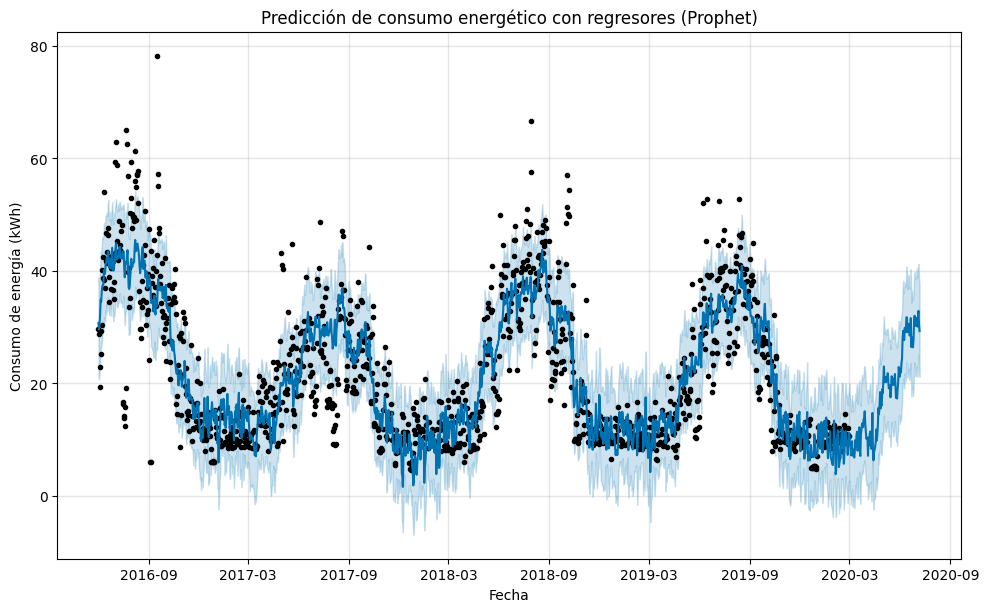

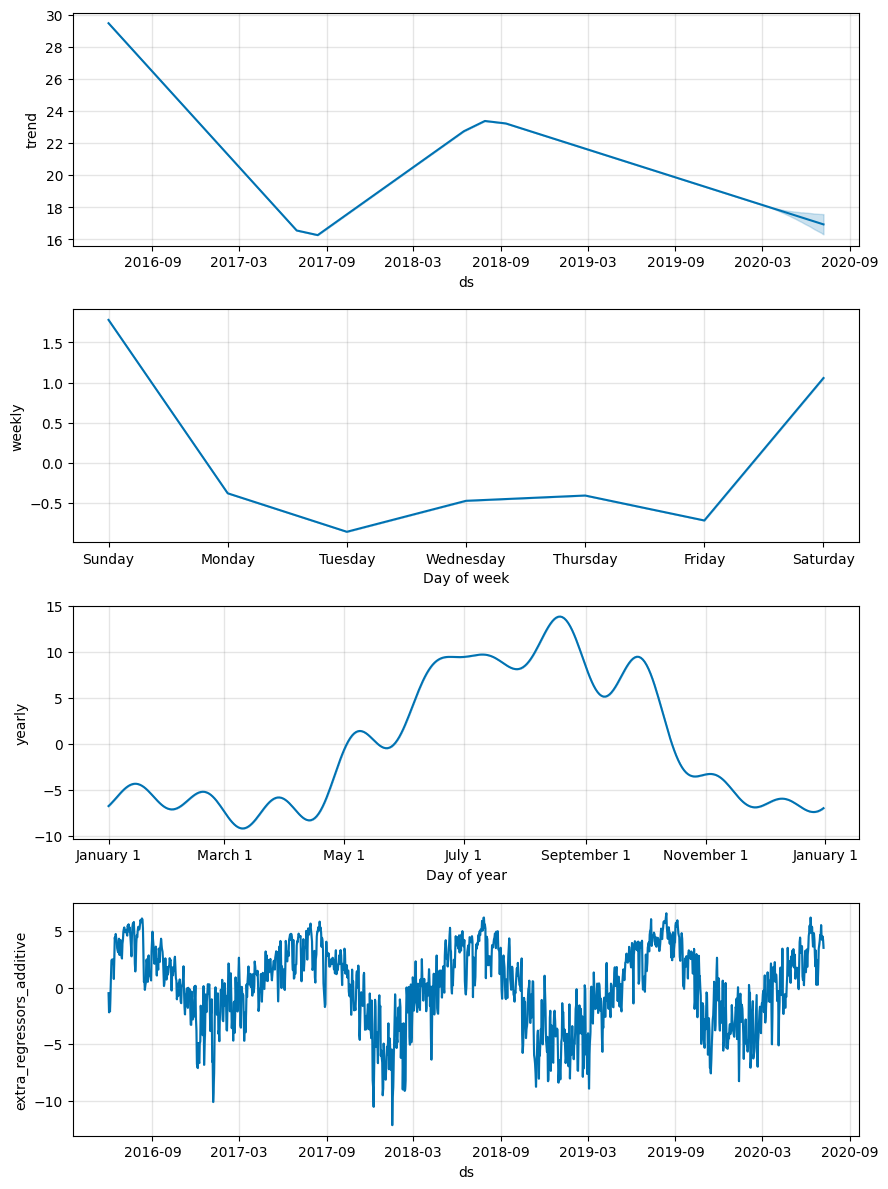

In [19]:
# 2.

# Se grafican las predicciones con regresores
model_with_regressors.plot(forecast_with_regressors)
plt.title('Predicción de consumo energético con regresores (Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.show()

# Se grafican las componentes del modelo, que ahora incluyen los regresores
model_with_regressors.plot_components(forecast_with_regressors)
plt.show()

In [20]:
# 3.

# Se calcula el MAE para el conjunto de entrenamiento y prueba con regresores
train_forecast_with_regressors = forecast_with_regressors[forecast_with_regressors['ds'] <= '2020-02-29']
test_forecast_with_regressors = forecast_with_regressors[forecast_with_regressors['ds'] >= '2020-03-01']

# MAE en el conjunto de entrenamiento
train_mae_with_regressors = mean_absolute_error(train_data['y'], train_forecast_with_regressors['yhat'])

# MAE en el conjunto de prueba
test_mae_with_regressors = mean_absolute_error(test_data['y'], test_forecast_with_regressors['yhat'])

print(f"MAE en el conjunto de entrenamiento con regresores: {train_mae_with_regressors}")
print(f"MAE en el conjunto de prueba con regresores: {test_mae_with_regressors}")

MAE en el conjunto de entrenamiento con regresores: 4.75119595670279
MAE en el conjunto de prueba con regresores: 4.5759444352902126


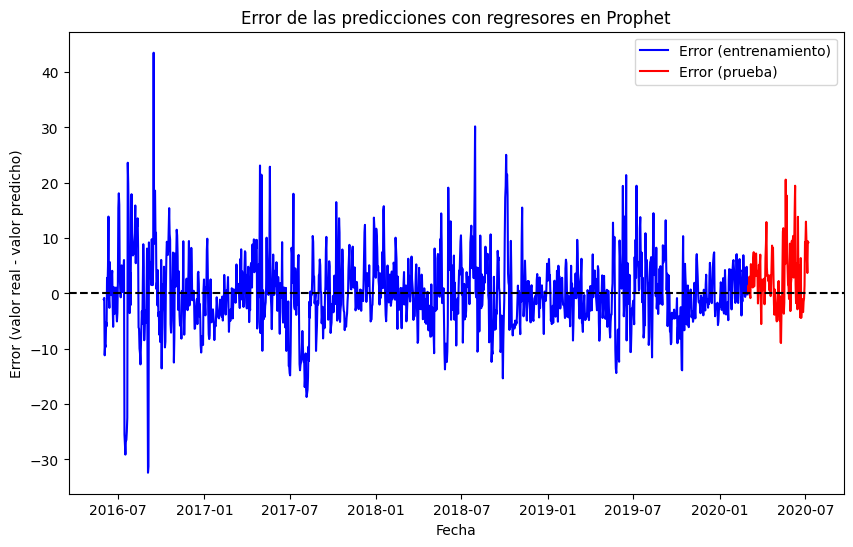

In [21]:
# 4.

# Se calcula el error (Valor real - Valor predicho) para el conjunto de entrenamiento y prueba
train_error_with_regressors = train_data['y'] - train_forecast_with_regressors['yhat']
test_error_with_regressors = test_data['y'] - test_forecast_with_regressors['yhat'].reset_index(drop=True)

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_error_with_regressors, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['ds'], test_error_with_regressors, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de las predicciones con regresores en Prophet')
plt.legend()
plt.show()

En este caso nuevamente se aprecia un comportamiento estacional en la serie de tiempo analizada. Se aprecian desempeños similares a los vistos con el modelo Prophet anterior en todos los aspectos revisados, pero ahora con valores de MAE levemente menores tanto para entrenamiento como para prueba, notando que se eliminó el pequeño sobreajuste visto anteriormente. De esta forma, las variables incluidas en el análisis aportan ligeramente en el comportamiento del consumo energético del hogar de Homero.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

<Figure size 1000x600 with 0 Axes>

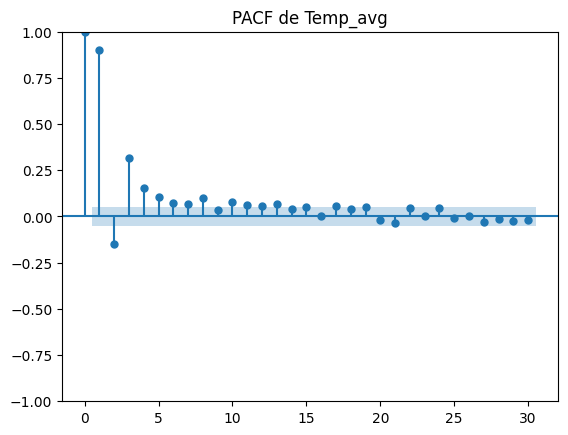

<Figure size 1000x600 with 0 Axes>

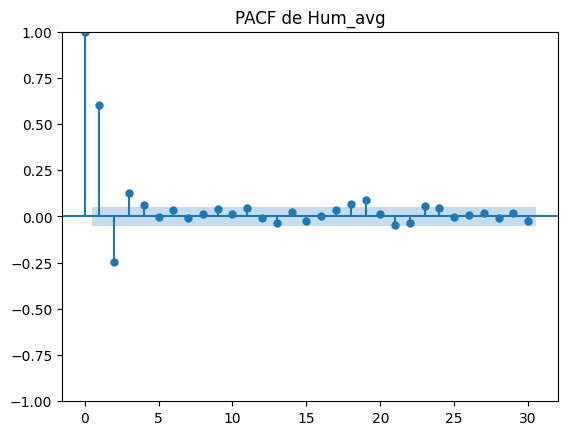

<Figure size 1000x600 with 0 Axes>

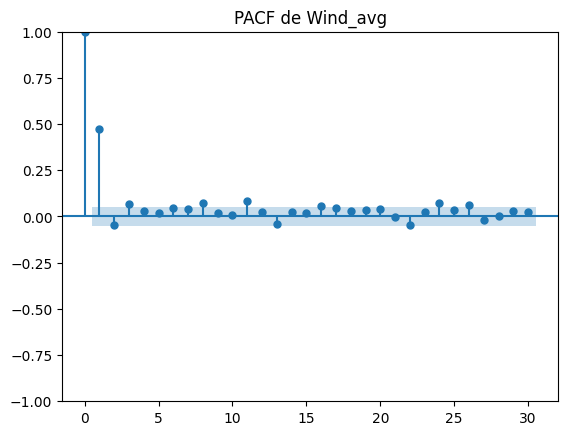

In [22]:
# 1.

from statsmodels.graphics.tsaplots import plot_pacf

# Se calculan y grafican las PACF para cada variable exógena Temp_avg
plt.figure(figsize=(10, 6))
plot_pacf(train_data['Temp_avg'].dropna(), lags=30, method='ywm', title="PACF de Temp_avg")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(train_data['Hum_avg'].dropna(), lags=30, method='ywm', title="PACF de Hum_avg")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(train_data['Wind_avg'].dropna(), lags=30, method='ywm', title="PACF de Wind_avg")
plt.show()

Para `Temp_avg`, `Hum_avg` y `Wind_avg` se consideran lags de [1,2,3,4,5], [1,2,3] y [1] días anteriores, respectivamente. Estos valores fueron seleccionados observando los picos significativos en la PACF de cada variable que superan los intervalos de confianza.

In [23]:
# 2.

# Lags para Temp_avg
for lag in [1, 2, 3, 4, 5]:
    train_data[f'Temp_avg_lag{lag}'] = train_data['Temp_avg'].shift(lag)
    test_data[f'Temp_avg_lag{lag}'] = test_data['Temp_avg'].shift(lag)

# Lags para Hum_avg
for lag in [1, 2, 3]:
    train_data[f'Hum_avg_lag{lag}'] = train_data['Hum_avg'].shift(lag)
    test_data[f'Hum_avg_lag{lag}'] = test_data['Hum_avg'].shift(lag)

# Lags para Wind_avg
train_data['Wind_avg_lag1'] = train_data['Wind_avg'].shift(1)
test_data['Wind_avg_lag1'] = test_data['Wind_avg'].shift(1)

In [24]:
# 3.

# Se imputan los valores nulos con la media de cada variable
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

In [25]:
# 4.

# Modelo Prophet
model = Prophet()

# Se añaden los regresores principales y sus lags
regresores = ['Temp_avg', 'Hum_avg', 'Wind_avg',
              'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5',
              'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3',
              'Wind_avg_lag1']

for reg in regresores:
    model.add_regressor(reg)

# Se entrena el modelo
model.fit(train_data)

# Se generan las fechas futuras para el conjunto de prueba
cols = regresores.copy()
cols.insert(0, 'ds')
future_dates = pd.concat([train_data[cols], test_data[cols]]).reset_index(drop=True)

# Se hacen las predicciones
forecast_with_regressors_lags = model.predict(future_dates)

# Se revisan las primeras filas del DataFrame de predicciones
forecast_with_regressors_lags[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/sar7x8os.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbnjwzam/xw10jr9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29277', 'data', 'file=/tmp/tmpmbnjwzam/sar7x8os.json', 'init=/tmp/tmpmbnjwzam/xw10jr9m.json', 'output', 'file=/tmp/tmpmbnjwzam/prophet_model1yrano_c/prophet_model-20241021001330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,30.337254,22.479815,38.245607
1,2016-06-02,29.234799,20.761829,37.782012
2,2016-06-03,29.390836,20.634929,37.793894
3,2016-06-04,31.293370,22.744895,39.713615
4,2016-06-05,32.996782,24.520124,41.508153


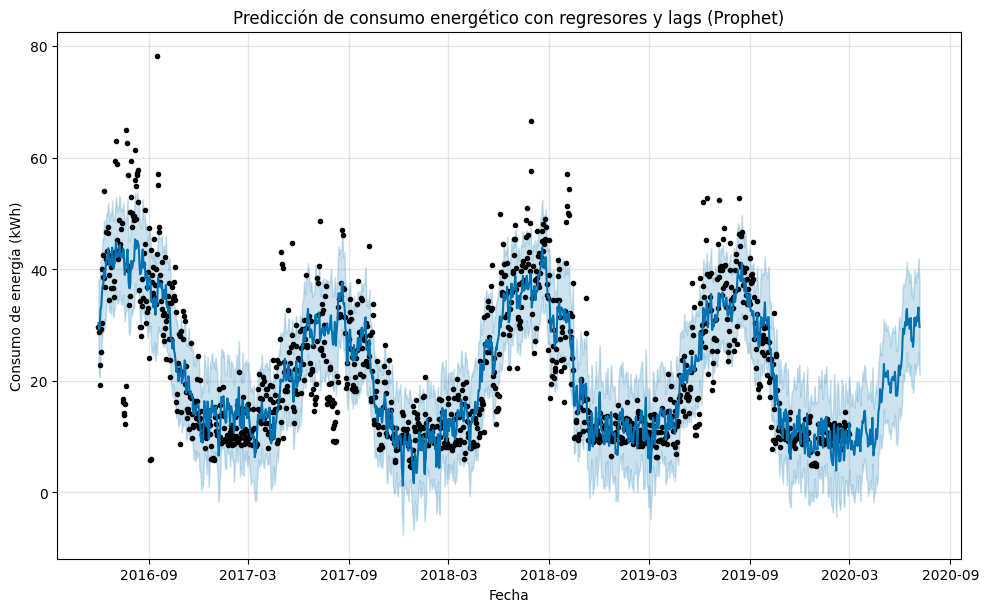

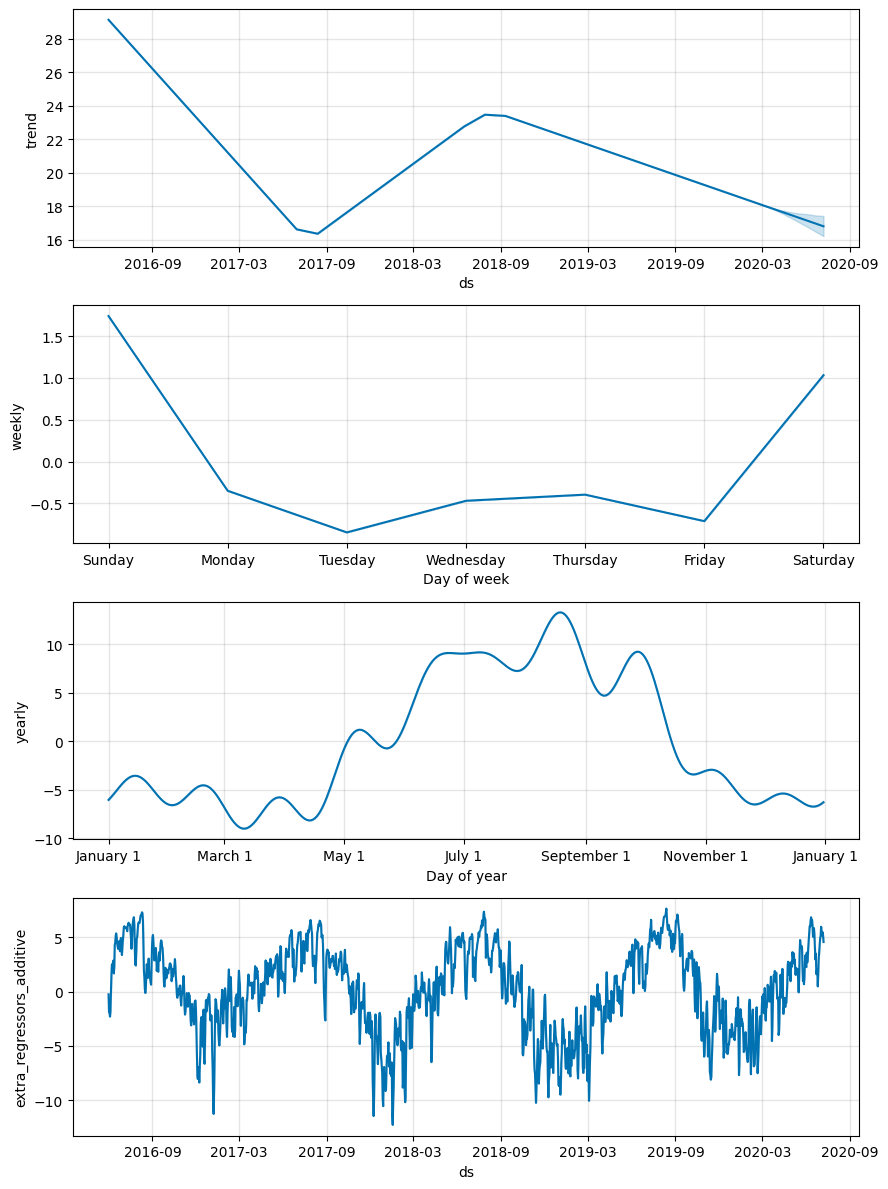

In [26]:
# 5.

# Se grafican las predicciones con regresores y lags
model.plot(forecast_with_regressors_lags)
plt.title('Predicción de consumo energético con regresores y lags (Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.show()

# Se grafican las componentes del modelo, que ahora incluyen los regresores y lags
model.plot_components(forecast_with_regressors_lags)
plt.show()

In [27]:
# 6.

# Se calcula el MAE para el conjunto de entrenamiento y prueba con regresores y lags
train_forecast_with_regressors_lags = forecast_with_regressors_lags[forecast_with_regressors_lags['ds'] <= '2020-02-29']
test_forecast_with_regressors_lags = forecast_with_regressors_lags[forecast_with_regressors_lags['ds'] >= '2020-03-01']

# MAE en el conjunto de entrenamiento
train_mae_with_regressors_lags = mean_absolute_error(train_data['y'], train_forecast_with_regressors_lags['yhat'])

# MAE en el conjunto de prueba
test_mae_with_regressors_lags = mean_absolute_error(test_data['y'], test_forecast_with_regressors_lags['yhat'])

print(f"MAE en el conjunto de entrenamiento con regresores y lags: {train_mae_with_regressors_lags}")
print(f"MAE en el conjunto de prueba con regresores y lags: {test_mae_with_regressors_lags}")

MAE en el conjunto de entrenamiento con regresores y lags: 4.71908929413411
MAE en el conjunto de prueba con regresores y lags: 4.550772439154311


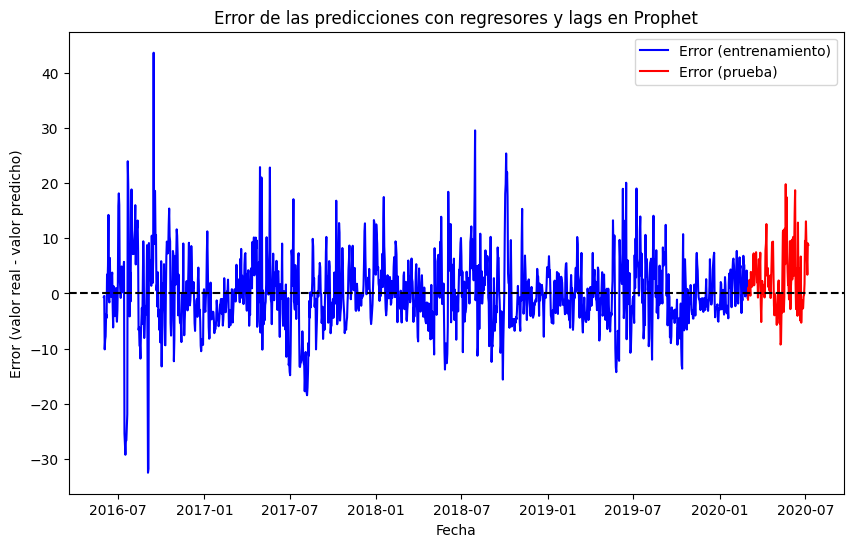

In [28]:
# 7.

# Se calcula el error (Valor real - Valor predicho) para el conjunto de entrenamiento y prueba
train_error_with_regressors_lags = train_data['y'] - train_forecast_with_regressors_lags['yhat']
test_error_with_regressors_lags = test_data['y'] - test_forecast_with_regressors_lags['yhat'].reset_index(drop=True)

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_error_with_regressors_lags, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['ds'], test_error_with_regressors_lags, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de las predicciones con regresores y lags en Prophet')
plt.legend()
plt.show()

En este caso nuevamente se aprecia un comportamiento estacional en la serie de tiempo analizada. Nuevamente se aprecian desempeños muy similares a los vistos con el modelo Prophet anterior en todos los aspectos revisados, experimentando otra vez una leve baja en los valores de MAE tanto para entrenamiento como para prueba (entre 0.02 y 0.03 de error). De esta forma, la inclusión de lags para las variables exógenas vistas aportan ligeramente en el comportamiento del consumo energético del hogar de Homero.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [29]:
# NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [30]:
# 1.

# Grilla de hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95]
}

# Optimización
tuning_results, best_params  = optimize_prophet(train_data, test_data,
                                          ['Temp_avg', 'Hum_avg', 'Wind_avg',
                                           'Temp_avg_lag1', 'Temp_avg_lag2',
                                           'Temp_avg_lag3', 'Temp_avg_lag4',
                                           'Temp_avg_lag5', 'Hum_avg_lag1',
                                           'Hum_avg_lag2', 'Hum_avg_lag3',
                                           'Wind_avg_lag1'],
                                          param_grid)

print(f'Mejores hiperparámetros: {best_params}')

Tuning Prophet parameters: 100%|██████████| 150/150 [02:55<00:00,  1.17s/it]

Mejores hiperparámetros: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


In [31]:
# 2.

# Modelo Prophet con los mejores parámetros
model_best = Prophet(**best_params)

# Se añaden los regresores principales y sus lags
for reg in regresores:
    model_best.add_regressor(reg)

# Se entrena el modelo
model_best.fit(train_data)

# Se generan las fechas futuras para el conjunto de prueba
future_dates = pd.concat([train_data[cols], test_data[cols]]).reset_index(drop=True)

# Se hacen las predicciones
forecast_with_regressors_lags_opt = model_best.predict(future_dates)

# Se revisan las primeras filas del DataFrame de predicciones
forecast_with_regressors_lags_opt[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,24.100786,15.390704,32.528359
1,2016-06-02,23.328434,15.124910,32.172209
2,2016-06-03,24.467570,15.925312,33.502909
3,2016-06-04,26.744621,18.335989,36.207629
4,2016-06-05,27.792435,19.089671,36.023762


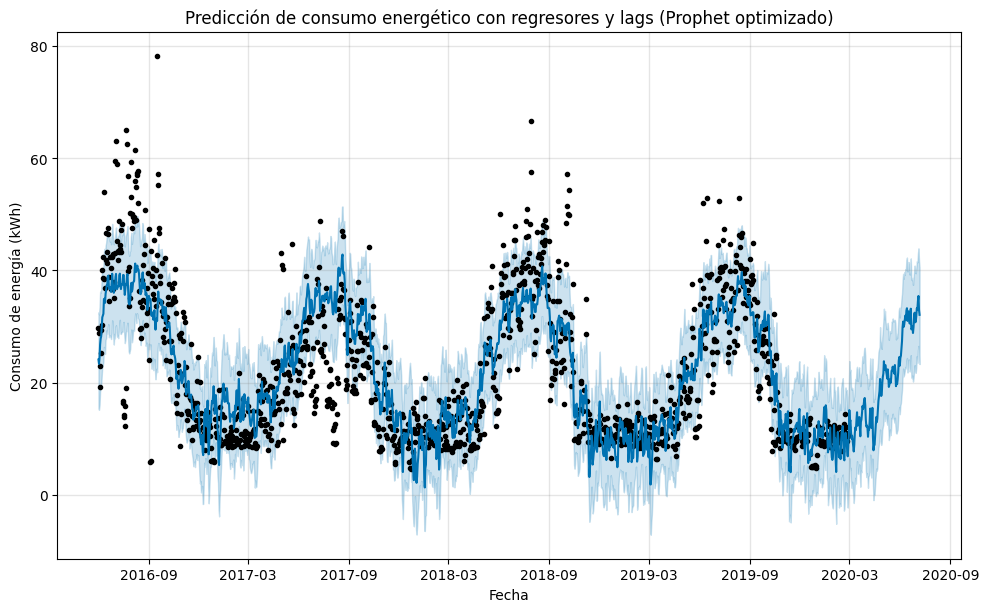

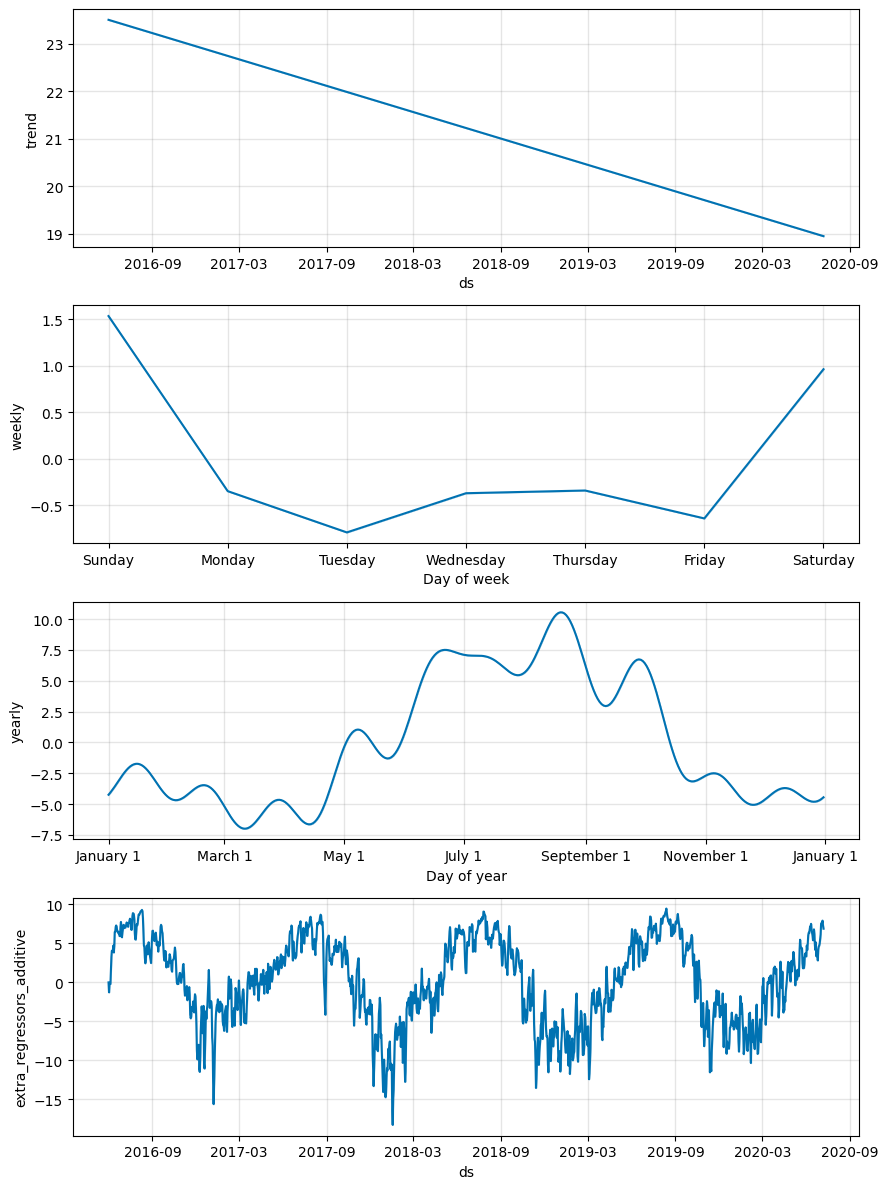

In [32]:
# 3.

# Se grafican las predicciones con regresores y lags, optimizado
model_best.plot(forecast_with_regressors_lags_opt)
plt.title('Predicción de consumo energético con regresores y lags (Prophet optimizado)')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía (kWh)')
plt.show()

# Se grafican las componentes del modelo optimizado, con regresores y lags
model_best.plot_components(forecast_with_regressors_lags_opt)
plt.show()

In [33]:
# 4.

# Se calcula el MAE para el conjunto de entrenamiento y prueba con regresores y lags, optimizado
train_forecast_with_regressors_lags_opt = forecast_with_regressors_lags_opt[forecast_with_regressors_lags_opt['ds'] <= '2020-02-29']
test_forecast_with_regressors_lags_opt = forecast_with_regressors_lags_opt[forecast_with_regressors_lags_opt['ds'] >= '2020-03-01']

# MAE en el conjunto de entrenamiento
train_mae_with_regressors_lags_opt = mean_absolute_error(train_data['y'], train_forecast_with_regressors_lags_opt['yhat'])

# MAE en el conjunto de prueba
test_mae_with_regressors_lags_opt = mean_absolute_error(test_data['y'], test_forecast_with_regressors_lags_opt['yhat'])

print(f"MAE en el conjunto de entrenamiento con regresores y lags, optimizado: {train_mae_with_regressors_lags_opt}")
print(f"MAE en el conjunto de prueba con regresores y lags, optimizado: {test_mae_with_regressors_lags_opt}")

MAE en el conjunto de entrenamiento con regresores y lags, optimizado: 5.319887173001965
MAE en el conjunto de prueba con regresores y lags, optimizado: 3.9143922203210852


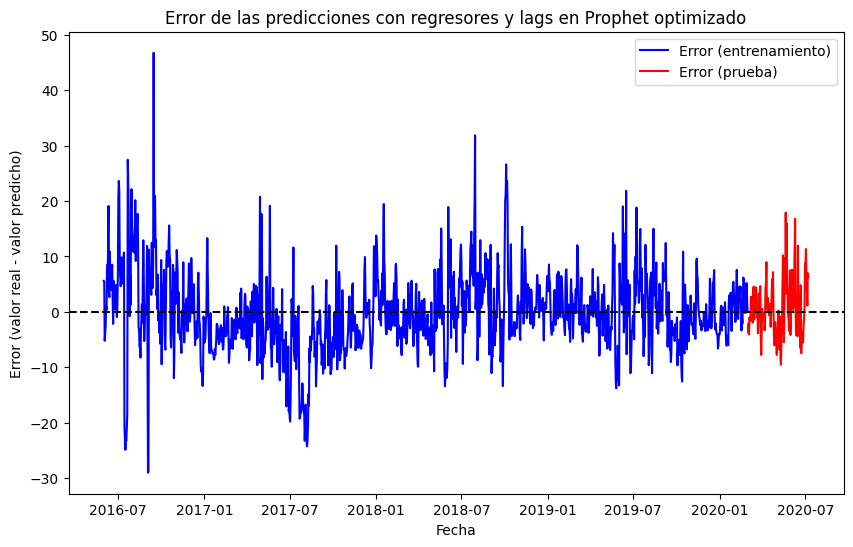

In [34]:
# 5.

# Se calcula el error (Valor real - Valor predicho) para el conjunto de entrenamiento y prueba
train_error_with_regressors_lags_opt = train_data['y'] - train_forecast_with_regressors_lags_opt['yhat']
test_error_with_regressors_lags_opt = test_data['y'] - test_forecast_with_regressors_lags_opt['yhat'].reset_index(drop=True)

# Se grafica el error
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_error_with_regressors_lags_opt, label='Error (entrenamiento)', color='blue')
plt.plot(test_data['ds'], test_error_with_regressors_lags_opt, label='Error (prueba)', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Error (valor real - valor predicho)')
plt.title('Error de las predicciones con regresores y lags en Prophet optimizado')
plt.legend()
plt.show()

Nuevamente se aprecia un comportamiento estacional en la serie de tiempo analizada. En este caso si varió el desempeño del modelo, notando un aumento del MAE para entrenamiento (0.5 de error) pero una baja para prueba (0.6 de error aproximadamente). Con esto, siguiendo el criterio de elegir el modelo que tenga mejor rendimiento para datos de prueba, el modelo optimizado sería la mejor opción (tiene el menor MAE en dicho conjunto). Ahora bien, sería importante evaluar porqué el modelo tiene un desempeño peor en el conjunto de entrenamiento, tanto desde el punto de vista de los datos como del modelo.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.

## Imports

In [35]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357274 sha256=22cc432f87174f2893763bb1e5a1f804cddfdfe2f29f48b567fa8c54c171d3d6
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [36]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [37]:
# Se carga el dataset
df = pd.read_csv('cervezas.csv')
df.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


In [38]:
# Permite verificar tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB


In [39]:
# Se verifica si hay nulos
df.isnull().sum()

,0
userId,0
beerId,0
rating,0
beerName,0
beerStyle,0


In [40]:
# Cantidad de cervezas en evaluación
df['beerId'].nunique()

3747

In [41]:
# Permite verificar que hay cervezas con nombres repetidos, al
# comparar con el resultado obtenido anteriormente
df['beerName'].nunique()

3689

In [42]:
# Cantidad de usuarios participantes
df['userId'].nunique()

706

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [43]:
print(f'Cantidad de usuarios: {df["userId"].nunique()}')
print(f'Cantidad de productos (cervezas): {df["beerId"].nunique()}')
print(f'Cantidad de calificaciones: {df.shape[0]}')
print(f'Cantidad de calificaciones faltantes: {df["rating"].isnull().sum()}')

media_por_usuario = df.groupby('userId')['rating'].mean()
media_por_cerveza = df.groupby('beerId')['rating'].mean()

print(f'Media de calificaciones por usuario: {media_por_usuario.mean():.2f}')
print(f'Media de calificaciones por cerveza: {media_por_cerveza.mean():.2f}')

Cantidad de usuarios: 706
Cantidad de productos (cervezas): 3747
Cantidad de calificaciones: 295059
Cantidad de calificaciones faltantes: 0
Media de calificaciones por usuario: 3.73
Media de calificaciones por cerveza: 3.79


In [44]:
df['rating'].describe()

,rating
count,295059.000000
mean,3.860367
std,0.702807
min,1.000000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


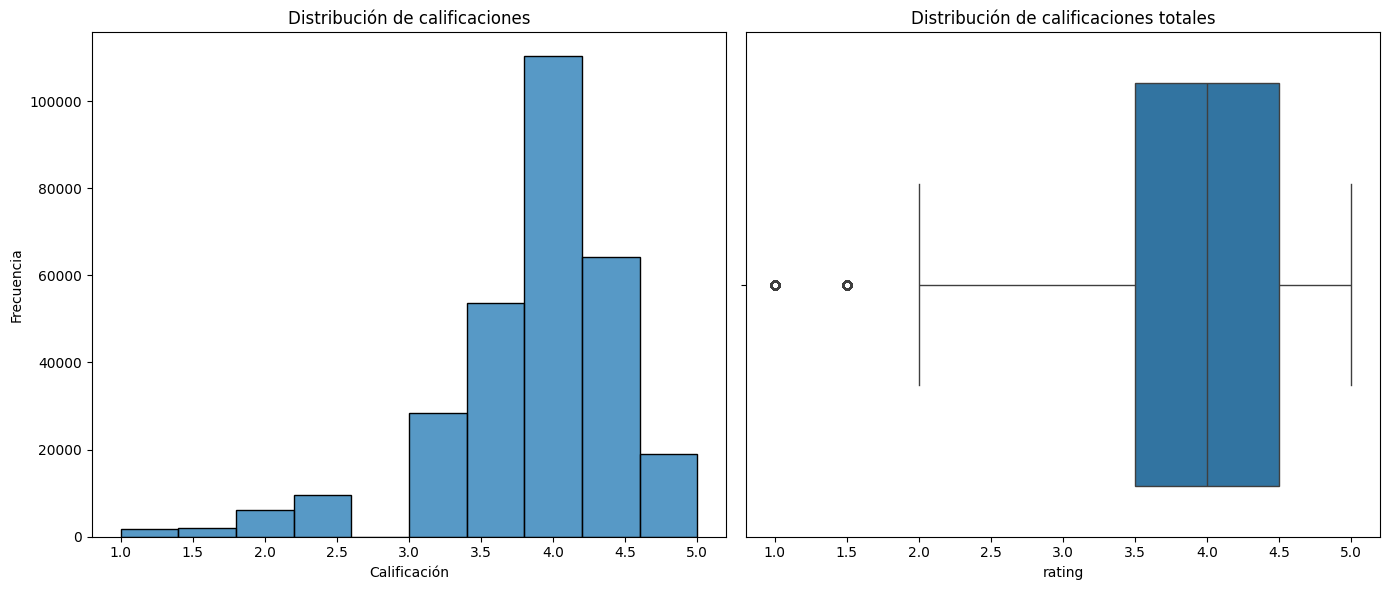

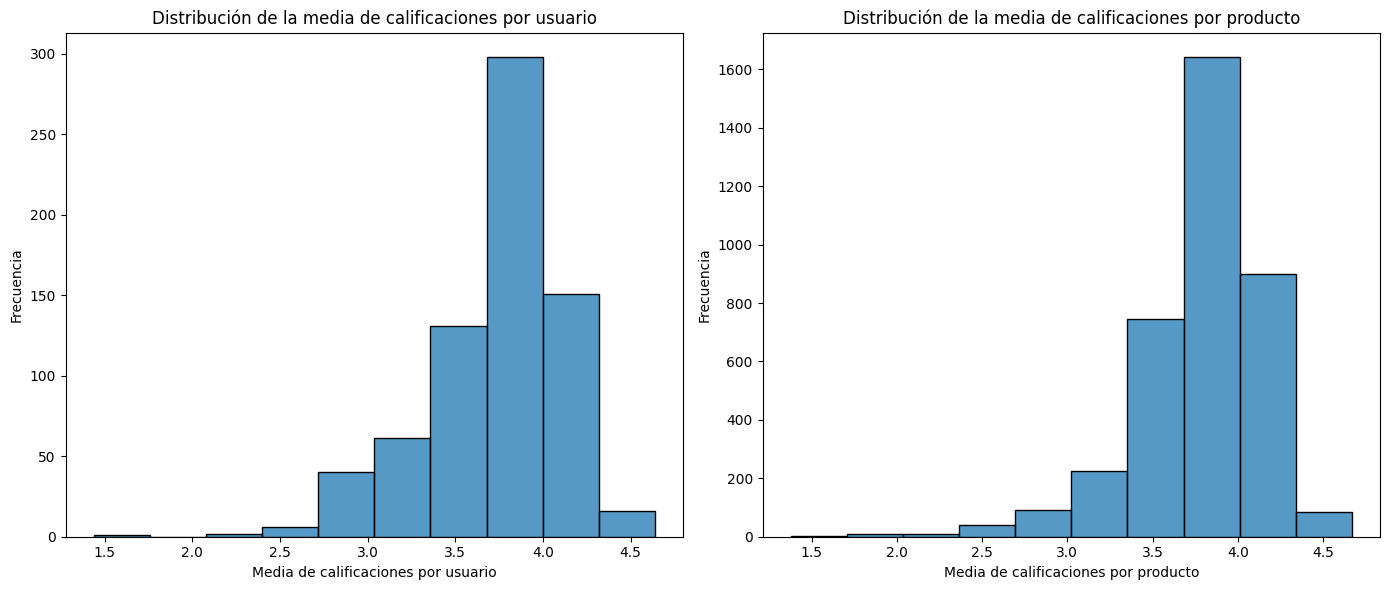

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histograma de las calificaciones
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Boxplot de calificaciones
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='rating')
plt.title('Distribución de calificaciones totales')

plt.tight_layout()
plt.show()

print()

# Gráficos de medias por usuario y por producto
plt.figure(figsize=(14, 6))

# Media por usuario
plt.subplot(1, 2, 1)
sns.histplot(media_por_usuario, bins=10, kde=False)
plt.title('Distribución de la media de calificaciones por usuario')
plt.xlabel('Media de calificaciones por usuario')
plt.ylabel('Frecuencia')

# Media por producto
plt.subplot(1, 2, 2)
sns.histplot(media_por_cerveza, bins=10, kde=False)
plt.title('Distribución de la media de calificaciones por producto')
plt.xlabel('Media de calificaciones por producto')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

  - ¿Cuantos *usuarios* hay en los datos?
  > Cantidad de usuarios: 706
  - ¿Cuantos *productos* hay en los datos?
  > Cantidad de productos (cervezas): 3747
  - ¿Cuantas *calificaciones* hay en los datos?
  > Cantidad de calificaciones: 295059
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  > Cantidad de calificaciones faltantes: 0
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?
  > Media de calificaciones por usuario: 3.73 \\
Media de calificaciones por cerveza: 3.79 \\

De los gráficos obtenidos se aprecia que un 50% de las calificaciones están entre 3.5 y 4.5, con la mediana en la nota 4.0. Por su parte, las medias de calificaciones al separar por usuario o producto no son muy distintas (distanciadas en 0.06 de nota aproximadamente).

In [46]:
# Matriz (usuario, producto)

# Se calculan las medias de las calificaciones duplicadas para cada
# combinación de usuario y cerveza, antes de aplicar el pivot
df_sin_duplicados = df.groupby(['userId', 'beerId']).agg({'rating': 'mean'}).reset_index()
df = df_sin_duplicados.pivot(index='userId', columns='beerId', values='rating')

# Se muestra la matriz
print("Matriz usuario-producto:")
display(df)

Matriz usuario-producto:


beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [47]:
df = pd.read_csv('cervezas.csv')
df_cervezas = df[['beerId', 'beerName', 'beerStyle']].drop_duplicates().reset_index(drop=True)
df_cervezas

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA
...,...,...,...
3742,47589,Red,American Amber / Red Ale
3743,62792,Splinter Black,American Double / Imperial Stout
3744,18432,Wittekerke Rosé,Fruit / Vegetable Beer
3745,4753,Hambleton Nightmare (Extra Stout Porter),English Porter


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Stopwords en inglés
stop_words = list(text.ENGLISH_STOP_WORDS)

# Se inicializa CountVectorizer con las condiciones dadas (minúsculas, stopwords y mínimo 10 apariciones)
vectorizer = CountVectorizer(lowercase=True, stop_words=stop_words, min_df=10)

# Se ajusta y transforma la columna 'beerStyle' usando el vectorizador
X = vectorizer.fit_transform(df_cervezas['beerStyle'])

# Se guarda el resultado en un DataFrame para visualizarlo
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# Función para encontrar las top 5 cervezas similares
def encontrar_cervezas_similares(beer_name, df_bow, df_cervezas):
    # Índice de la cerveza objetivo
    idx = df_cervezas[df_cervezas['beerName'] == beer_name].index[0]

    # Similitud coseno entre todas las cervezas
    similitudes = cosine_similarity(df_bow)

    # Top 5 cervezas más similares (excluyendo la cerveza en sí misma)
    similar_indices = similitudes[idx].argsort()[-6:-1][::-1]

    # Se imprimen las cervezas más similares
    print(f"Las 5 cervezas más similares a '{beer_name}' son:\n")
    for i in similar_indices:
        print(df_cervezas.iloc[i]['beerName'])

# Para 'Chocolate Porter':
encontrar_cervezas_similares('Chocolate Porter', df_bow, df_cervezas)

Las 5 cervezas más similares a 'Chocolate Porter' son:

Saint Bridget's Porter
Red Eye Coffee Porter
Cowboy Coffee Porter
State Pen Porter
Arctic Rhino Coffee Porter


In [50]:
# Se encuentra la cerveza mejor evaluada por Homero (userId = 100)
homero_cervezas = df[df['userId'] == 100]
mejor_cerveza_homero = homero_cervezas.loc[homero_cervezas['rating'].idxmax()]['beerName']
print(f"La cerveza mejor evaluada por Homero es: {mejor_cerveza_homero}\n\n")

# Se encuentran el top 5 cervezas similares a la mejor evaluada por Homero
encontrar_cervezas_similares(mejor_cerveza_homero, df_bow, df_cervezas)

La cerveza mejor evaluada por Homero es: McNeill's Extra Special Bitter


Las 5 cervezas más similares a 'McNeill's Extra Special Bitter' son:

S.O.B. (Special Old Bitter Ale)
Phoenixx Double ESB
XS Imperial Younger's Special Bitter
Redhook ESB
The Wise ESB


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [51]:
# Se crea el objeto Reader, especificando el rango de ratings
reader = Reader(rating_scale=(1.0, 5.0))

# Se convierte el DataFrame a un Dataset de Surprise
data = Dataset.load_from_df(df[['userId', 'beerId', 'rating']], reader)

data

Se destaca que sí es importante el orden, según lo específicado por la [documentación](https://surprise.readthedocs.io/en/stable/_modules/surprise/dataset.html#Dataset.load_from_df).

In [52]:
from surprise.model_selection import train_test_split

# Se divide el conjunto de datos en entrenamiento y prueba (30% para prueba)
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

In [53]:
# Se define el modelo KNN basado en usuarios utilizando similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': True
}
model_knn_user = KNNBasic(sim_options=sim_options)

# Se entrena el modelo
model_knn_user.fit(trainset)

# Se realizan predicciones en el conjunto de prueba
predictions_user = model_knn_user.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [54]:
# Se calcula el MAE
mae_user = accuracy.mae(predictions_user)

# Se convierten las predicciones a un DataFrame
pred_df_user = pd.DataFrame(predictions_user, columns=['userId', 'beerId', 'true_ratings', 'predicted_ratings', 'details'])

display(pred_df_user.head())

MAE:  0.4639


,userId,beerId,true_ratings,predicted_ratings,details
0,1628,9755,4.5,4.200000,"{'actual_k': 40, 'was_impossible': False}"
1,187,601,2.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
2,112,409,3.0,3.862500,"{'actual_k': 40, 'was_impossible': False}"
3,738,5051,4.0,4.027027,"{'actual_k': 37, 'was_impossible': False}"
4,141,4394,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"


In [55]:
# Se define el modelo KNN basado en productos utilizando similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': False  # False para KNN basado en productos
}
model_knn_item = KNNBasic(sim_options=sim_options)

# Se entrena el modelo
model_knn_item.fit(trainset)

# Se realizan predicciones en el conjunto de prueba
predictions_item = model_knn_item.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
# Se calcula el MAE
mae_item = accuracy.mae(predictions_item)

# Se convierten las predicciones a un DataFrame
pred_df_item = pd.DataFrame(predictions_item, columns=['userId', 'beerId', 'true_ratings', 'predicted_ratings', 'details'])

display(pred_df_item.head())

MAE:  0.4640


,userId,beerId,true_ratings,predicted_ratings,details
0,1628,9755,4.5,4.200000,"{'actual_k': 40, 'was_impossible': False}"
1,187,601,2.0,3.825000,"{'actual_k': 40, 'was_impossible': False}"
2,112,409,3.0,3.862500,"{'actual_k': 40, 'was_impossible': False}"
3,738,5051,4.0,4.000615,"{'actual_k': 40, 'was_impossible': False}"
4,141,4394,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"


Los resultados señalan que ambos modelos presentan un error absoluto medio (MAE) muy similar, lo que indica que ambos enfoques son igualmente efectivos para realizar predicción de calificaciones para las cervezas. Sin embargo, es importante destacar la diferencia en tiempos de ejecución presentes, teniendo que el modelo basado en usuarios tardó 30 segundos, y el modelo basado en productos 3 minutos, lo que tiene sentido ya que el número de cervezas es mucho mayor que la cantidad de usuarios. De esta forma, se selecciona el modelo KNN basado en usuarios como el mejor entre los dos modelos revisados.

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [57]:
# Se entrena un modelo NMF asegurando la reproducibilidad
model_nmf = NMF(random_state=42)
model_nmf.fit(trainset)

# Se generan predicciones para el conjunto de prueba
predictions_nmf = model_nmf.test(testset)

In [58]:
# Se calcula el MAE
mae_nmf = accuracy.mae(predictions_nmf)

# Se convierten las predicciones a un DataFrame
pred_df_nmf = pd.DataFrame(predictions_nmf, columns=['userId', 'beerId', 'true_ratings', 'predicted_ratings', 'details'])

display(pred_df_nmf.head())

MAE:  0.4826


,userId,beerId,true_ratings,predicted_ratings,details
0,1628,9755,4.5,3.682730,{'was_impossible': False}
1,187,601,2.0,3.714152,{'was_impossible': False}
2,112,409,3.0,3.973135,{'was_impossible': False}
3,738,5051,4.0,3.767895,{'was_impossible': False}
4,141,4394,4.0,3.910392,{'was_impossible': False}


In [59]:
# Se entrena un modelo SVD
model_svd = SVD(random_state=42)
model_svd.fit(trainset)

# Se generan predicciones para el conjunto de prueba
predictions_svd = model_svd.test(testset)

In [60]:
# Se calcula el MAE
mae_svd = accuracy.mae(predictions_svd)

# Se convierten las predicciones a un DataFrame
pred_df_svd = pd.DataFrame(predictions_svd, columns=['userId', 'beerId', 'true_ratings', 'predicted_ratings', 'details'])

display(pred_df_svd.head())

MAE:  0.4610


,userId,beerId,true_ratings,predicted_ratings,details
0,1628,9755,4.5,4.022229,{'was_impossible': False}
1,187,601,2.0,3.807105,{'was_impossible': False}
2,112,409,3.0,3.885699,{'was_impossible': False}
3,738,5051,4.0,4.014968,{'was_impossible': False}
4,141,4394,4.0,3.926274,{'was_impossible': False}


En este caso, tanto el modelo NMF como el modelo SVD tienen tiempos de ejecución similares (8 y 4 segundos, respectivamente). Por otro lado, en este caso si existen diferencias en cuanto a la magnitud del MAE obtenido, teniendo que para el modelo NMF es 0.4826, y para el modelo SVD es 0.4610. Así, se selecciona el modelo SVD dado que sus predicciones son más cercanas a las calificaciones reales dadas por los usuarios (menor error en promedio). Esta elección también abarca a los modelos revisados anteriormente (KNN), ya que éstos tienen peor desempeño tanto en error de predicción como en tiempo de ejecución.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [61]:
# NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [62]:
# 1.

def get_top_n(predictions_df, n=10):
    # Se eliminan las predicciones duplicadas
    predictions_df = predictions_df.drop_duplicates(subset=['userId', 'beerId'])

    top_n = {}

    # Se recorre el DataFrame de predicciones
    for _, row in predictions_df.iterrows():
        uid = row['userId']  # Identificador de usuario
        iid = row['beerId']  # Identificador de cerveza
        est = row['predicted_ratings']  # Calificación estimada

        # Si el usuario no está en el diccionario, se inicializa una lista en el diccionario
        if uid not in top_n:
            top_n[uid] = []

        # Se añade la cerveza y su estimación a la lista del usuario
        top_n[uid].append((iid, est))

    # Se ordenan por calificación estimada y seleccionan los mejores N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Se obtienen las 3 mejores cervezas recomendadas para Homero (userId = 100)
top_3_recommendations = get_top_n(pred_df_svd, n=3)
homero_recommendations = top_3_recommendations.get(100, [])
print("Las 3 mejores cervezas recomendadas para Homero (userId = 100):\n", homero_recommendations)


Las 3 mejores cervezas recomendadas para Homero (userId = 100):
 [(325, 3.941802288645008), (1393, 3.926976399705735), (1884, 3.7638289292285254)]


In [63]:
# 2.

# Cervezas que Homero no ha evaluado
homero_evaluated = df[df['userId'] == 100]['beerId'].unique()
all_beers = df_cervezas['beerId'].unique()
unrated_beers = [beer for beer in all_beers if beer not in homero_evaluated]

# Se seleccionan 5 cervezas aleatorias no evaluadas
random_beers = np.random.choice(unrated_beers, 5, replace=False)

# Se hacen predicciones para estas cervezas
homero_predictions = []
for beer in random_beers:
    est = model_svd.predict(uid=100, iid=beer).est
    homero_predictions.append((beer, est))

print("Predicciones para cervezas aleatorias no evaluadas por Homero:")
print(homero_predictions)

Predicciones para cervezas aleatorias no evaluadas por Homero:
[(6477, 3.7420146009427175), (21010, 3.7855030432065933), (1495, 3.8772210282422392), (59145, 3.787810546956461), (6228, 3.600802183459134)]


In [64]:
# 3.

# Se calculan los promedios de precisión@k y recall@k
precision_k, recall_k = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)
metrics_df = pd.DataFrame({
    'user_id': precision_k.keys(),
    'precision': precision_k.values(),
    'recall': recall_k.values()
})

metrics_df

,user_id,precision,recall
0,1628,0.9,0.036290
1,187,0.9,0.043269
2,112,1.0,0.013736
3,738,1.0,0.060241
4,141,1.0,0.013947
...,...,...,...
701,15925,1.0,1.000000
702,11974,1.0,1.000000
703,1903,1.0,1.000000
704,318,0.0,0.000000


In [67]:
metrics_df[['precision', 'recall']].describe()

,precision,recall
count,706.000000,706.000000
mean,0.743331,0.339868
std,0.349032,0.367231
min,0.000000,0.000000
25%,0.700000,0.031250
50%,0.900000,0.185185
75%,1.000000,0.588235
max,1.000000,1.000000


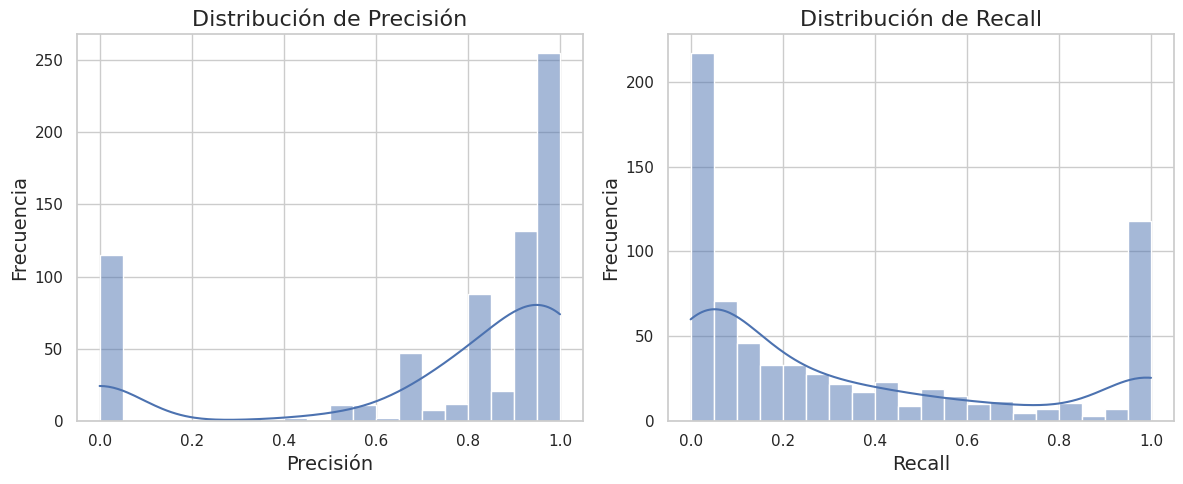

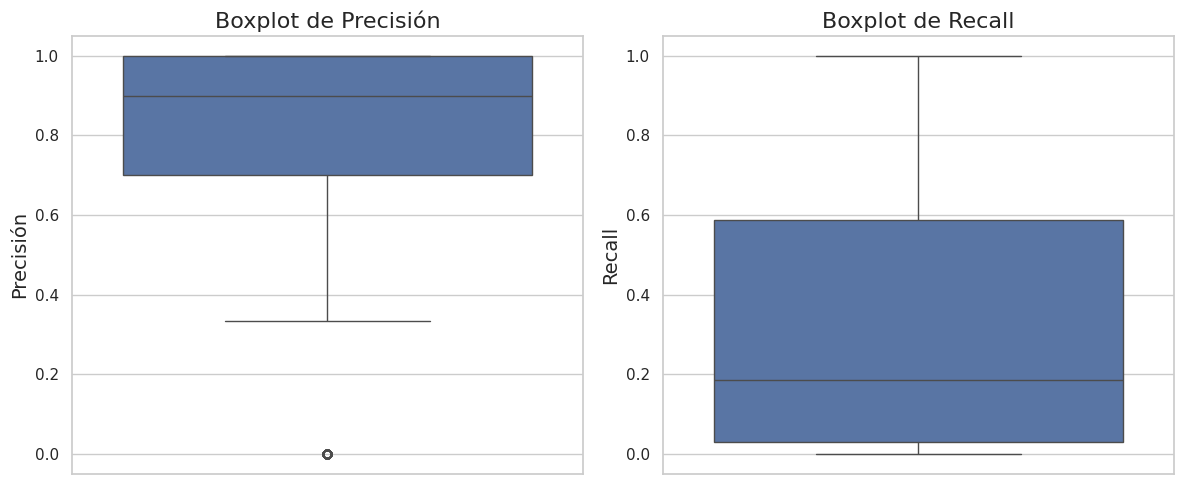

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histogramas
plt.figure(figsize=(12, 5))

# Histograma de precisión
plt.subplot(1, 2, 1)
sns.histplot(metrics_df['precision'], bins=20, kde=True)
plt.title('Distribución de Precisión', fontsize=16)
plt.xlabel('Precisión', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Histograma de recall
plt.subplot(1, 2, 2)
sns.histplot(metrics_df['recall'], bins=20, kde=True)
plt.title('Distribución de Recall', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))

# Boxplot de precisión
plt.subplot(1, 2, 1)
sns.boxplot(y=metrics_df['precision'])
plt.title('Boxplot de Precisión', fontsize=16)
plt.ylabel('Precisión', fontsize=14)

# Boxplot de recall
plt.subplot(1, 2, 2)
sns.boxplot(y=metrics_df['recall'])
plt.title('Boxplot de Recall', fontsize=16)
plt.ylabel('Recall', fontsize=14)

plt.tight_layout()
plt.show()

El modelo presenta un valor medio alto para precisión, pero bajo para recall. Esto indica que, por un lado, cuando el modelo recomienda una cerveza, es bastante probable que sea de agrado para el usuario (alta precisión). Por otro, aunque el modelo hace recomendaciones de alta calidad, no está logrando recomendar cervezas que el usuario particular podría disfrutar (bajo recall). Además, se destaca que para ambas métricas los valores de desviación estándar son considerables, lo que indica que algunos usuarios están recibiendo recomendaciones muy efectivas, mientras que otros no tanto.

De esta forma, el modelo en promedio no es malo, pero tampoco se considera bueno, tanto por la baja métrica en recall como por la alta dispersión en el desempeño entre usuarios.

In [89]:
# 4.

k_values = range(3, 26)
precision_results = []
recall_results = []

for k in k_values:
    precision, recall = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    precision_results.append(np.array(list(precision.values())).mean())
    recall_results.append(np.array(list(recall.values())).mean())

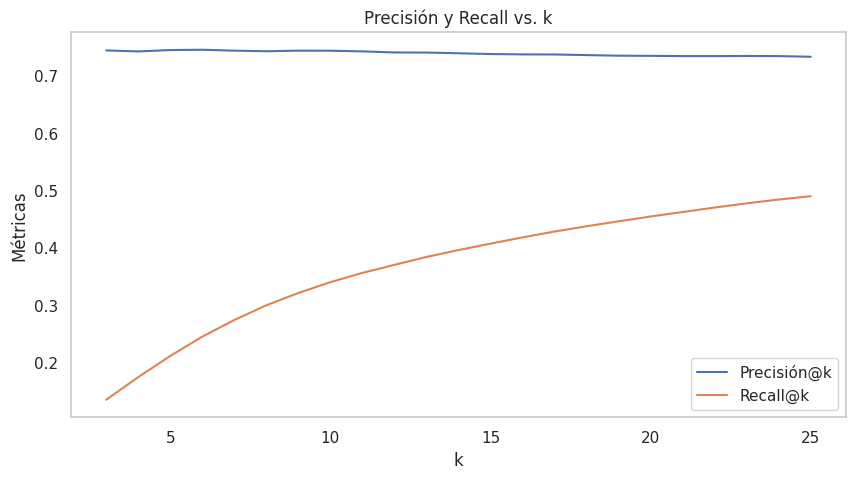

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_values, precision_results, label='Precisión@k')
plt.plot(k_values, recall_results, label='Recall@k')
plt.title('Precisión y Recall vs. k')
plt.xlabel('k')
plt.ylabel('Métricas')
plt.legend()
plt.grid()
plt.show()

Del gráfico se obtiene que el valor de precisión no varía frente a k, pero el recall sí. Esto tiene sentido, ya que aumentar el valor de k implica considerar un mayor número de cervezas para calcular la métrica. Luego, si hay más cervezas, es más probable que no se escapen recomendaciones que el usuario podría disfrutar (mayor recall).

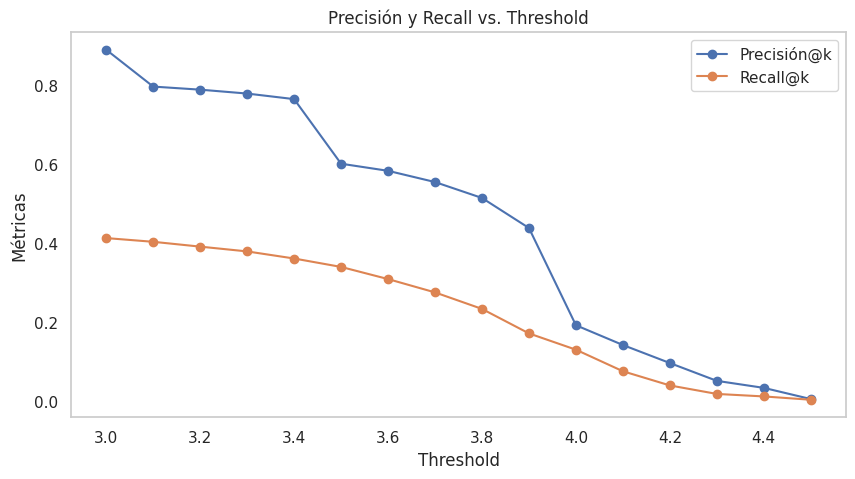

In [92]:
# 5.

threshold_values = np.arange(3.0, 4.6, 0.1)
precision_threshold_results = []
recall_threshold_results = []

for threshold in threshold_values:
    precision, recall = precision_recall_at_k(predictions_svd, k=10, threshold=threshold)
    precision_threshold_results.append(np.array(list(precision.values())).mean())
    recall_threshold_results.append(np.array(list(recall.values())).mean())

plt.figure(figsize=(10, 5))
plt.plot(threshold_values, precision_threshold_results, label='Precisión@k', marker='o')
plt.plot(threshold_values, recall_threshold_results, label='Recall@k', marker='o')
plt.title('Precisión y Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Métricas')
plt.legend()
plt.grid()
plt.show()

Del gráfico se observa que tanto la precisión como el recall varían frente al threshold, que representa qué tan estricto se debe ser con las recomendaciones. A medida que aumenta dicha variable, ambas métricas decaen, lo que tiene sentido ya que cada vez existen menos cervezas con calificaciones superiores.

De ambos análisis, los parámetros que entregan los mejores resultados son k = 25 y threshold = 3.

In [101]:
# 6.

# Todas las combinaciones de usuario y cerveza
all_user_ids = pred_df_svd['userId'].unique()
all_beer_ids = pred_df_svd['beerId'].unique()
all_user_beer_combinations = pd.MultiIndex.from_product([all_user_ids, all_beer_ids], names=['userId', 'beerId'])

# DataFrame con las predicciones
predictions_df = pd.DataFrame(all_user_beer_combinations.to_frame(index=False), columns=['userId', 'beerId'])
predictions_df['predicted_rating'] = predictions_df.apply(lambda x: model_svd.predict(x['userId'], x['beerId']).est, axis=1)

# Filtrar para mantener solo las filas sin valores nulos
predictions_df = predictions_df[predictions_df['predicted_rating'].notnull()]
print("Predicciones de ratings (usuario, cerveza) sin valores nulos:")
predictions_df

Predicciones de ratings (usuario, cerveza) sin valores nulos:


,userId,beerId,predicted_rating
0,1628,9755,4.022229
1,1628,601,3.988819
2,1628,409,3.953901
3,1628,5051,3.962481
4,1628,4394,4.042656
...,...,...,...
2645377,4412,53985,3.749827
2645378,4412,6303,3.744131
2645379,4412,9582,3.637095
2645380,4412,49522,3.705074


# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
